# 01. Importing Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl
from sklearn.preprocessing import StandardScaler

# 02. Importing Data

In [2]:
# Create path
path = r"C:\Users\erj03\OneDrive\Documents\Achievement 6"

In [3]:
# Import data
df = pd.read_csv(os.path.join(path, 'insurance.csv'), index_col = False)

In [4]:
# View dataframe
df.head()

age     sex     bmi  children smoker   region      charges
0   19  female  27.900         0    yes     West  16884.92400
1   18    male  33.770         1     no    South   1725.55230
2   28    male  33.000         3     no    South   4449.46200
3   33    male  22.705         0     no  Midwest  21984.47061
4   32    male  28.880         0     no  Midwest   3866.85520

In [5]:
# Check shape of dataframe
df.shape

(1337, 7)

# 03. Data Prep

In [6]:
# Create subset of smokers
df_smokers = df[df['smoker'] == 'yes']

In [7]:
# Drop non-numerical columns
smokers_numeric = df_smokers[['age', 'bmi', 'children', 'charges']]

In [8]:
# View new dataframe
smokers_numeric.head()

age    bmi  children     charges
0    19  27.90         0  16884.9240
11   62  26.29         0  27808.7251
14   27  42.13         0  39611.7577
19   30  35.30         0  36837.4670
23   34  31.92         1  37701.8768

In [9]:
# Check descriptive statistics of columns
smokers_numeric.describe()

age         bmi    children       charges
count  274.000000  274.000000  274.000000    274.000000
mean    38.514599   30.708449    1.113139  32050.231832
std     13.923186    6.318644    1.157066  11541.547176
min     18.000000   17.195000    0.000000  12829.455100
25%     27.000000   26.083750    0.000000  20826.244213
50%     38.000000   30.447500    1.000000  34456.348450
75%     49.000000   35.200000    2.000000  41019.207275
max     64.000000   52.580000    5.000000  63770.428010

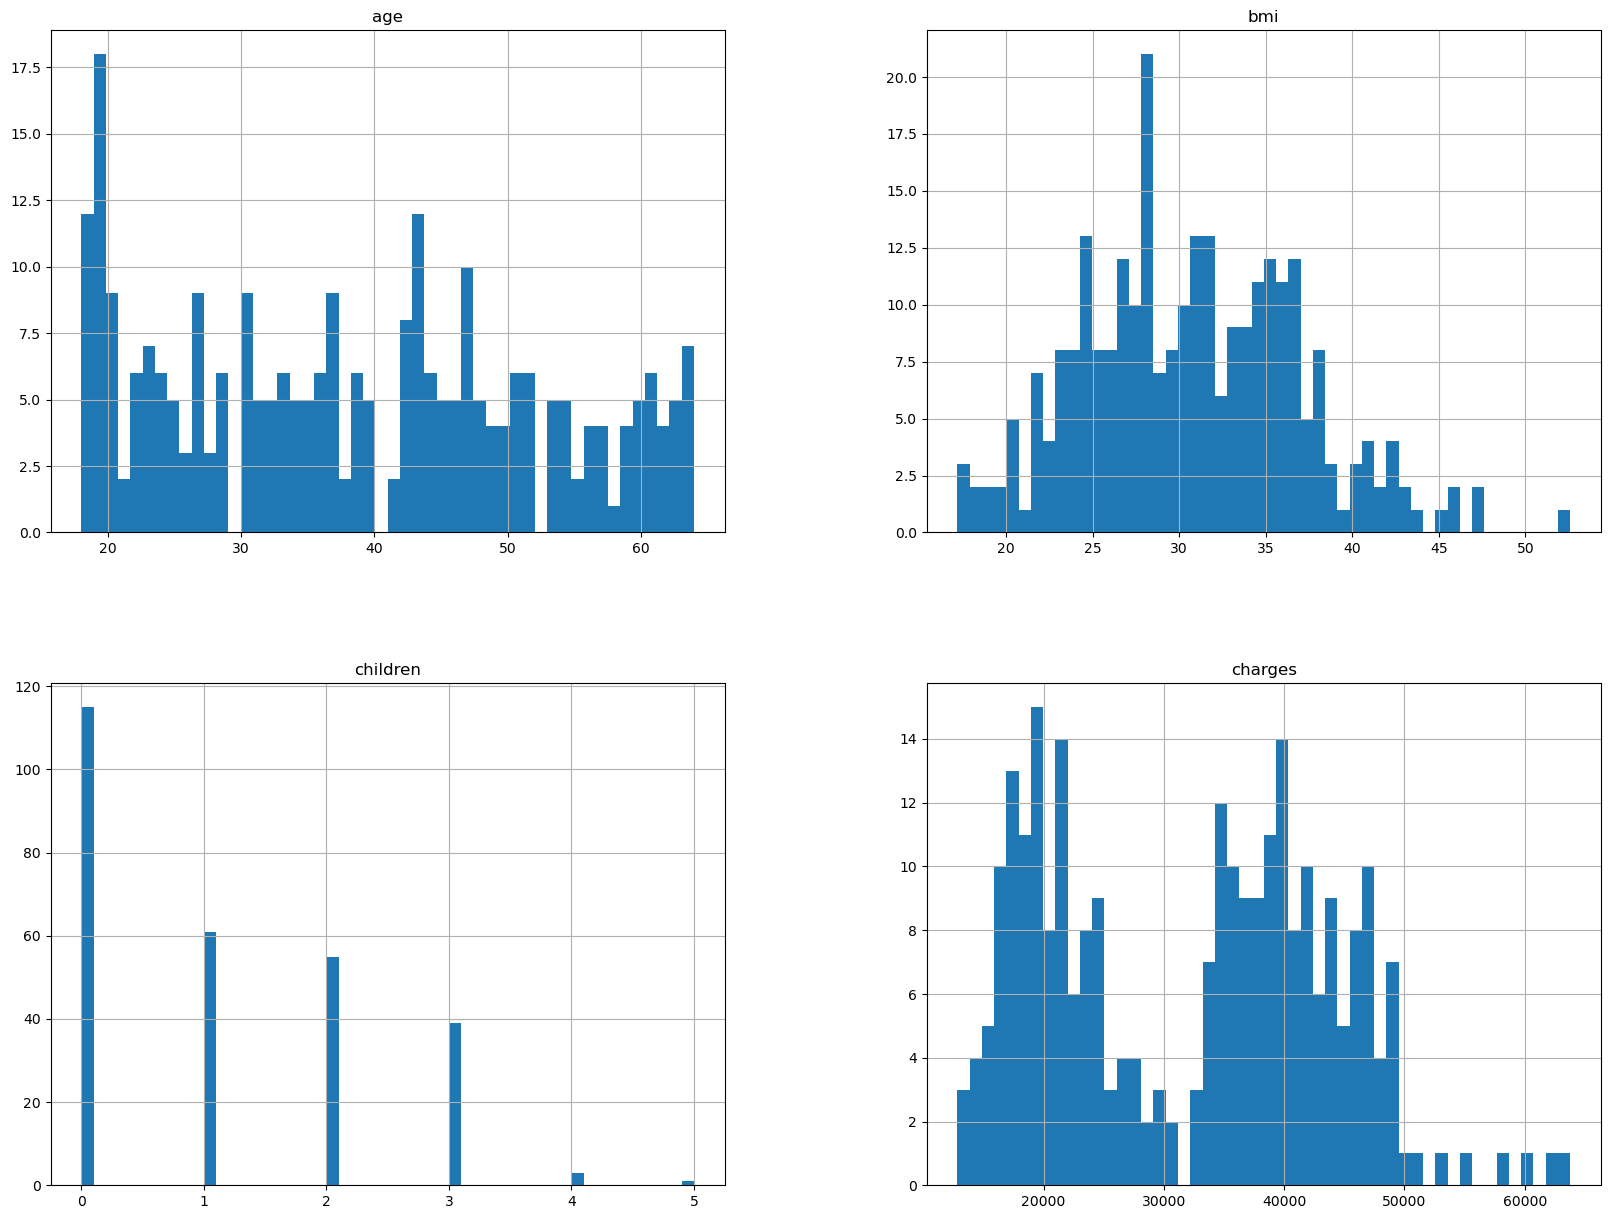

In [10]:
# Visualize data
smokers_numeric.hist(bins=50, figsize=(20, 15))
plt.show()

In [11]:
# Standardize data
scaler = StandardScaler()
df_standardized = scaler.fit_transform(smokers_numeric)

In [12]:
# Check standardization
print(df_standardized)

[[-1.40415473 -0.4452835  -0.96379619 -1.31637964]
 [ 1.68987015 -0.70055124 -0.96379619 -0.36817143]
 [-0.82852219  1.81090288 -0.96379619  0.65635586]
 ...
 [ 1.68987015 -0.63633793 -0.96379619 -0.34277247]
 [ 0.25078881  1.53185242  0.76787696  1.02826949]
 [ 1.61791608 -0.25977836 -0.96379619 -0.25249598]]


# 04. Elbow Technique

In [13]:
# Define range for number of clusters
num_cl = range(1, 10)

In [14]:
# Define k-means clusters
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [15]:
# Create scores for each cluster option
score = [kmeans[i].fit(df_standardized).score(df_standardized) for i in range(len(kmeans))]

C:\Users\erj03\OneDrive\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\erj03\OneDrive\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\erj03\OneDrive\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\erj03\OneDrive\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on 

In [16]:
# View scores
score

[-1096.0,
 -703.5600001198079,
 -565.0625669630105,
 -455.16106535531657,
 -377.1570217320217,
 -306.752587223154,
 -270.3380826924275,
 -250.55497296811583,
 -231.7607741652916]

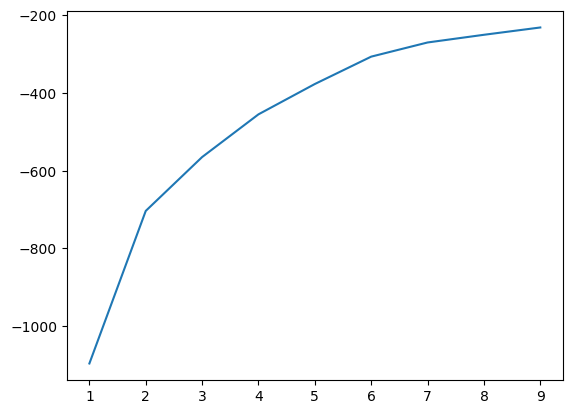

In [17]:
# Plot the elbow curve using PyLab
pl.plot(num_cl,score)
pl.show()

Based on the plot above, 2 clusters would work best for this analysis.

# 05. K-means Clustering

In [26]:
# Create the k-means object
kmeans = KMeans(n_clusters = 2)

In [27]:
# Fit the k-means object to the data
kmeans.fit(df_standardized)

C:\Users\erj03\OneDrive\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\erj03\OneDrive\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=2)

In [28]:
# Add column for cluster assignment
smokers_numeric['cluster'] = kmeans.fit_predict(df_standardized)

C:\Users\erj03\OneDrive\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\erj03\OneDrive\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\erj03\AppData\Local\Temp\ipykernel_6696\3117163880.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smokers_numeric['cluster'] = kmeans.fit_predict(df_standardized)


In [29]:
# View updated dataframe
smokers_numeric.head()

age    bmi  children     charges  clusters  cluster
0    19  27.90         0  16884.9240         6        1
11   62  26.29         0  27808.7251         3        1
14   27  42.13         0  39611.7577         4        0
19   30  35.30         0  36837.4670         4        0
23   34  31.92         1  37701.8768         2        0

In [30]:
# Check value counts for clusters column
smokers_numeric['cluster'].value_counts()

cluster
0    147
1    127
Name: count, dtype: int64

Text(0.5, 1.0, 'Smokers: BMI vs Medical Costs')

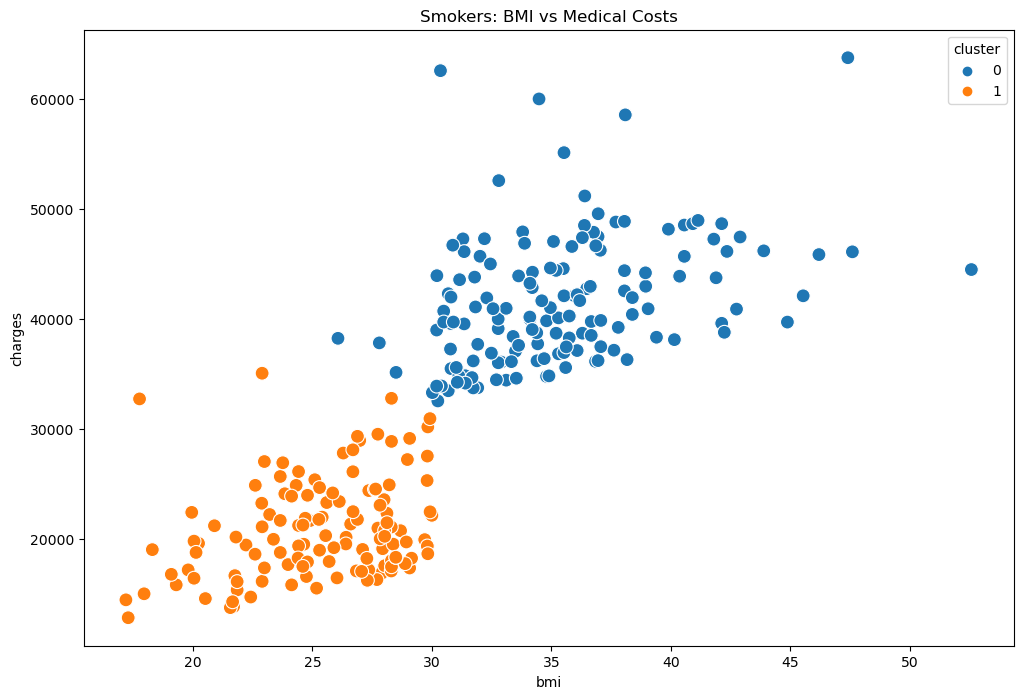

In [31]:
# Plot clusters for bmi and charges columns
plt.figure(figsize=(12, 8))
sns.scatterplot(data=smokers_numeric, x='bmi', y='charges', hue='cluster', s=100)
plt.title('Smokers: BMI vs Medical Costs')

In [32]:
# Export dataset with cluster column
smokers_numeric.to_csv(os.path.join(path, 'cluster_analysis.csv'))